In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
# Load and explore
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/UM/WID 3006/Data_info.csv')

In [ ]:
print(df)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Check for missing
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
# Seperate numrical and categorical
df_numerical = df.select_dtypes(include='number')
df_categorical = df.select_dtypes(include='object')

In [ ]:
# Fill numerical with mean
for col in df_numerical.columns:
    df_numerical[col].fillna(df_numerical[col].mean(), inplace=True)

In [ ]:
# Fill categorical with most frequent value
for col in df_categorical.columns:
    df_categorical[col].fillna(df_categorical[col].mode()[0], inplace=True)

# Dropping non relevant features
df_categorical.drop(columns=['dataset'], inplace=True)

# Perform one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
df_categorical = pd.DataFrame(encoder.fit_transform(df_categorical), columns=encoder.get_feature_names_out(df_categorical.columns))

C:\Users\kelvi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Dropping non relevant features
df_numerical.drop(columns=['id'], inplace=True)

In [ ]:
# Standardizing
scaler = StandardScaler()
df_numerical = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

In [ ]:
# Apply GMM model
df = pd.concat([df_numerical, df_categorical], axis=1)

# fit
n_comp = 5
gmm = GaussianMixture(n_components=n_comp)
gmm.fit(df)

# predict
clusters = gmm.predict(df)

C:\Users\kelvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


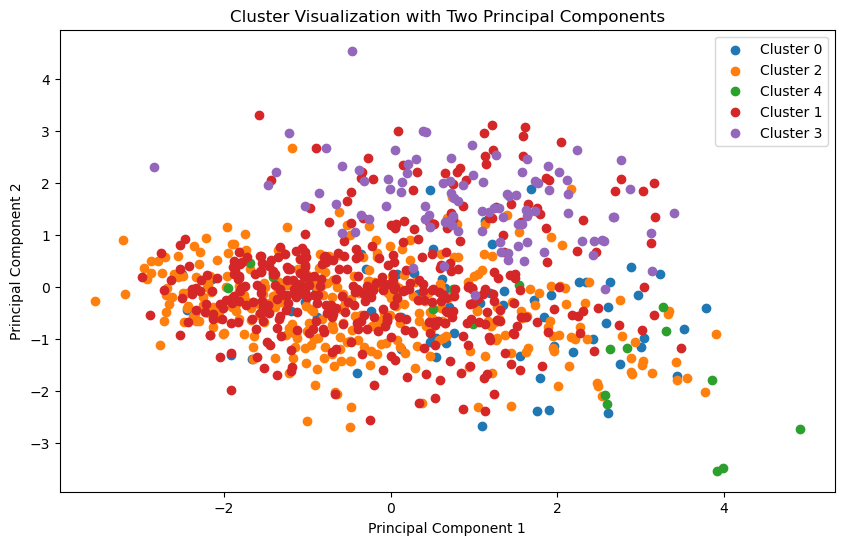

In [ ]:
# Visualise the clusters with two principal components
pca = PCA(n_components=n_comp)
principal_components = pca.fit_transform(df)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principal_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
for cluster in principal_df['Cluster'].unique():
    cluster_data = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization with Two Principal Components')
plt.legend()
plt.show()

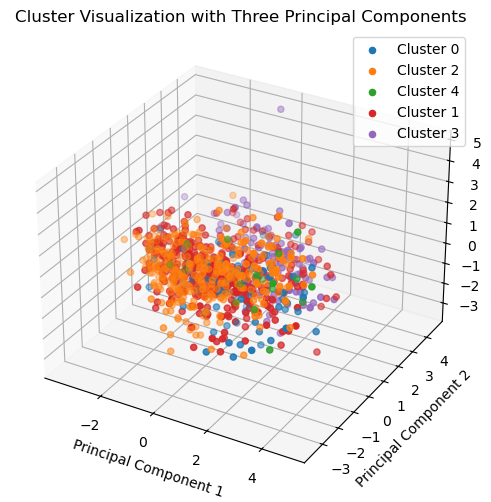

In [ ]:
# Visualise the clusters with three principal components
pca = PCA(n_components=n_comp)
principal_components = pca.fit_transform(df)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principal_df['Cluster'] = clusters

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in principal_df['Cluster'].unique():
    cluster_data = principal_df[principal_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Cluster Visualization with Three Principal Components')
ax.legend()
plt.show()